
Loading the imputed dataset...

===== Data Quality Assessment =====

Dataset Shape: (943, 38)

Column Types:
id                                   int64
activitydate                datetime64[ns]
totalsleeprecords                  float64
totalminutesasleep                 float64
totaltimeinbed                     float64
totalsteps                           int64
totaldistance                      float64
trackerdistance                    float64
loggedactivitiesdistance           float64
veryactivedistance                 float64
moderatelyactivedistance           float64
lightactivedistance                float64
sedentaryactivedistance            float64
veryactiveminutes                  float64
fairlyactiveminutes                float64
lightlyactiveminutes               float64
sedentaryminutes                     int64
calories                             int64
steptotal                            int64
avg_intensity_night                float64
avg_intensity_morning         

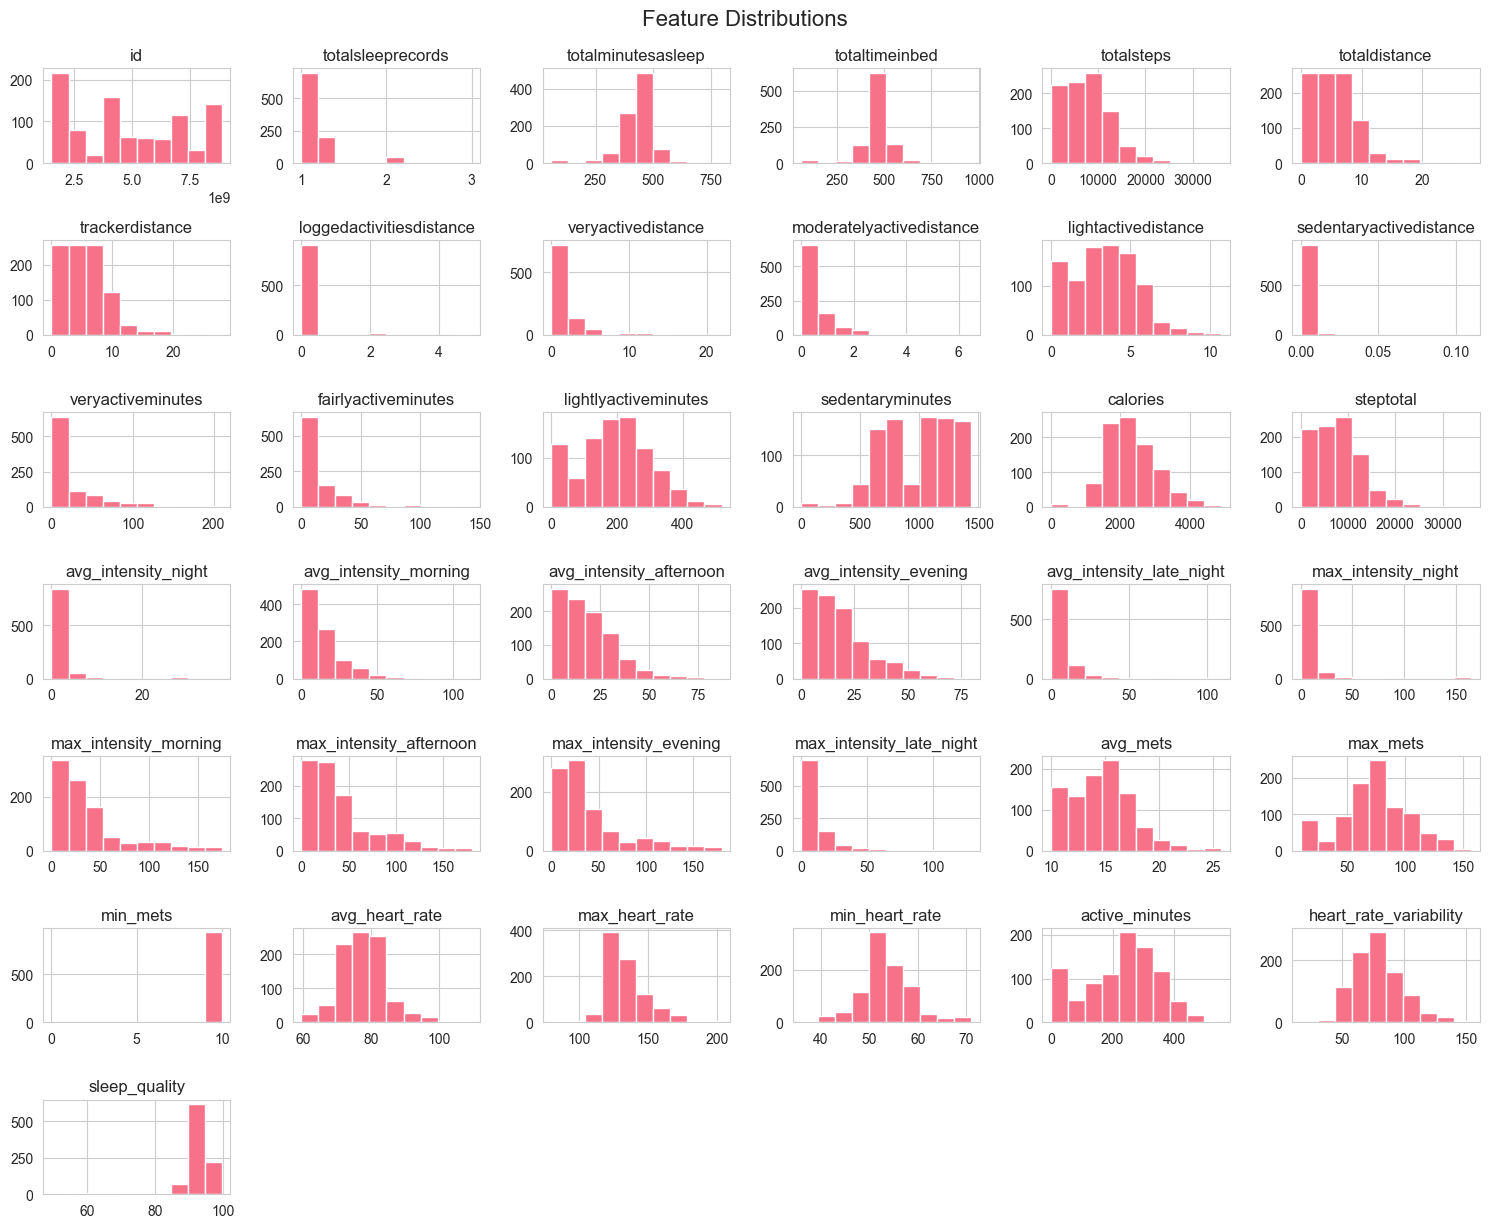

/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_means.index, y=activity_means.values, palette='husl')


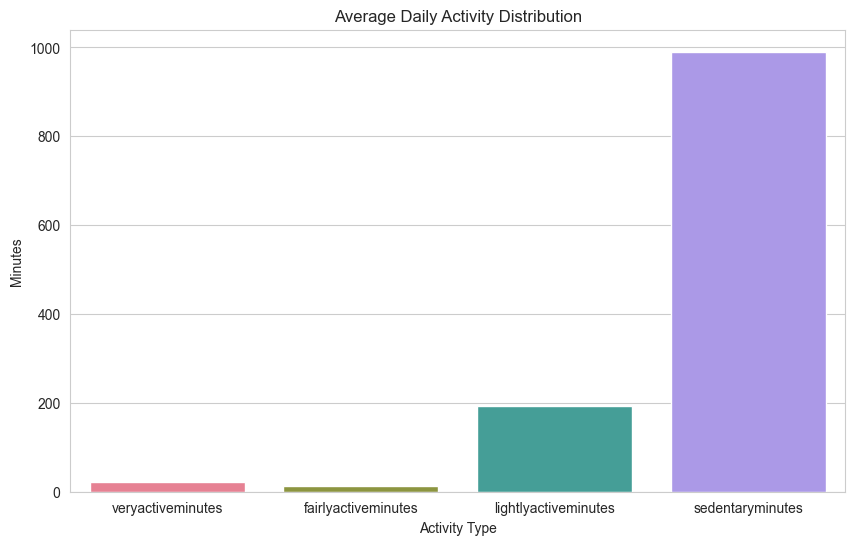

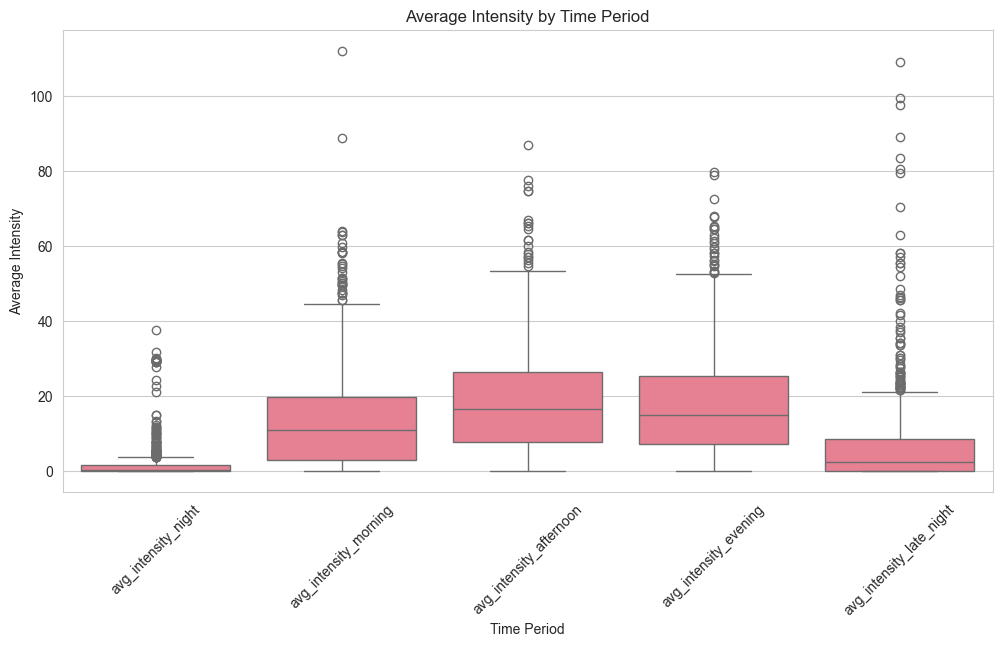

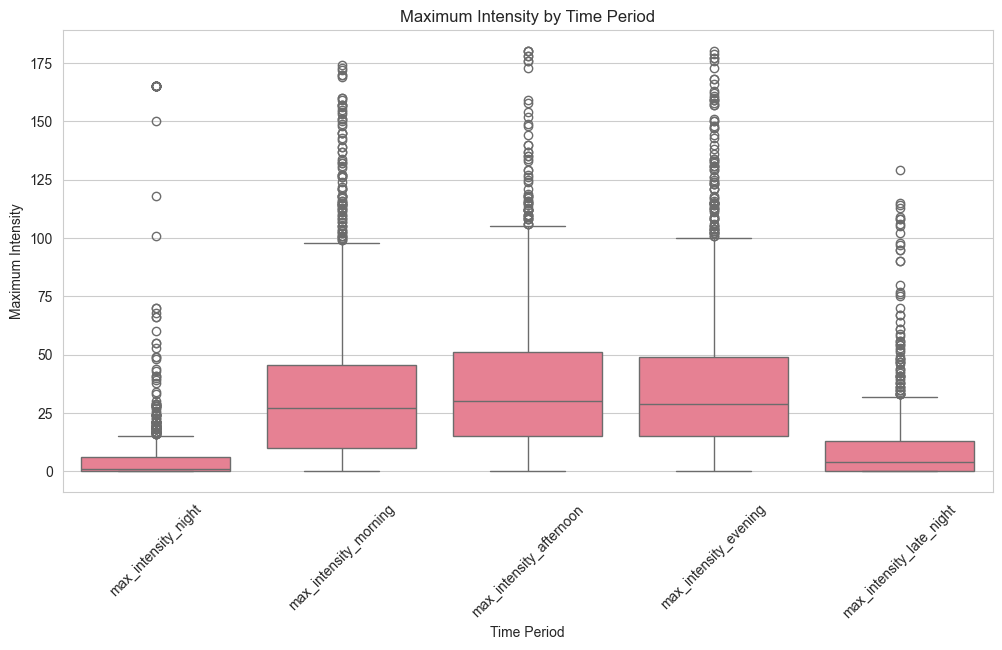

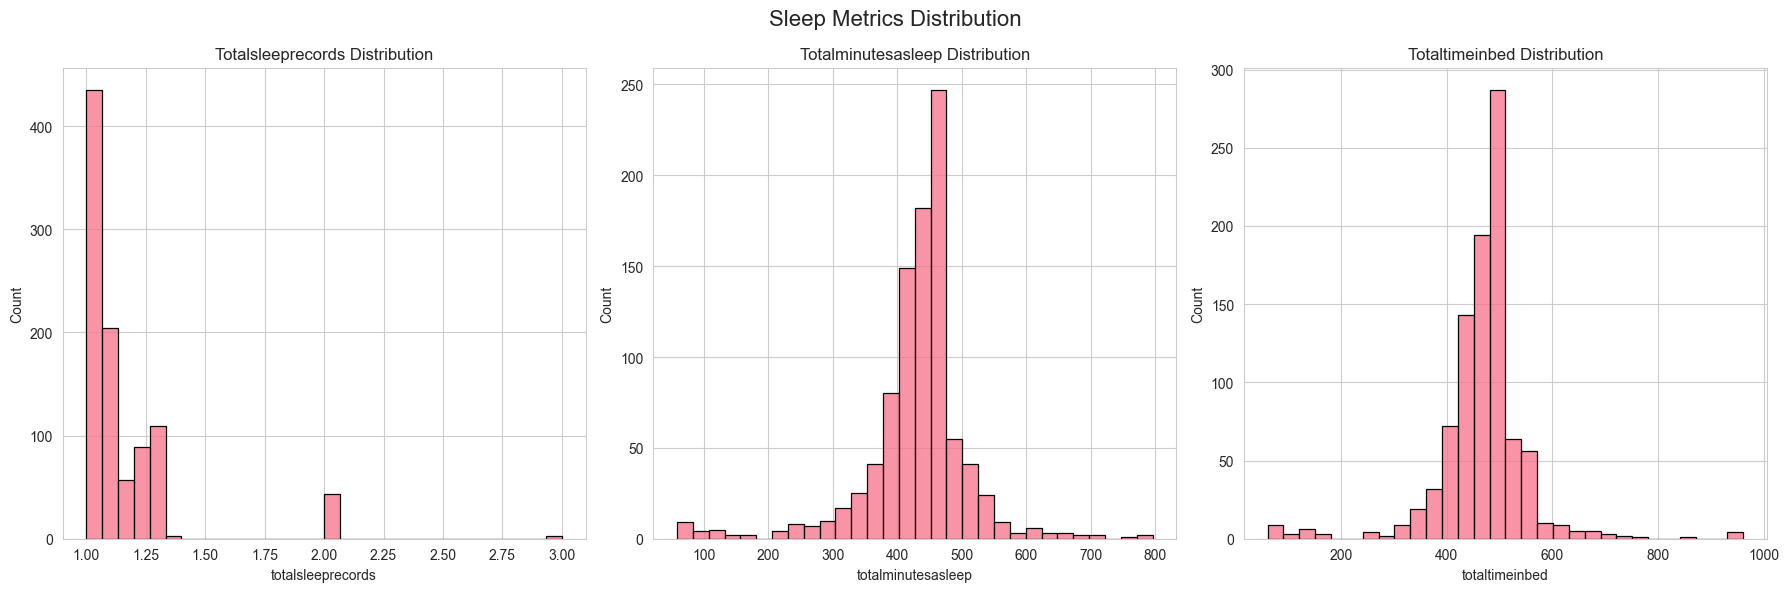

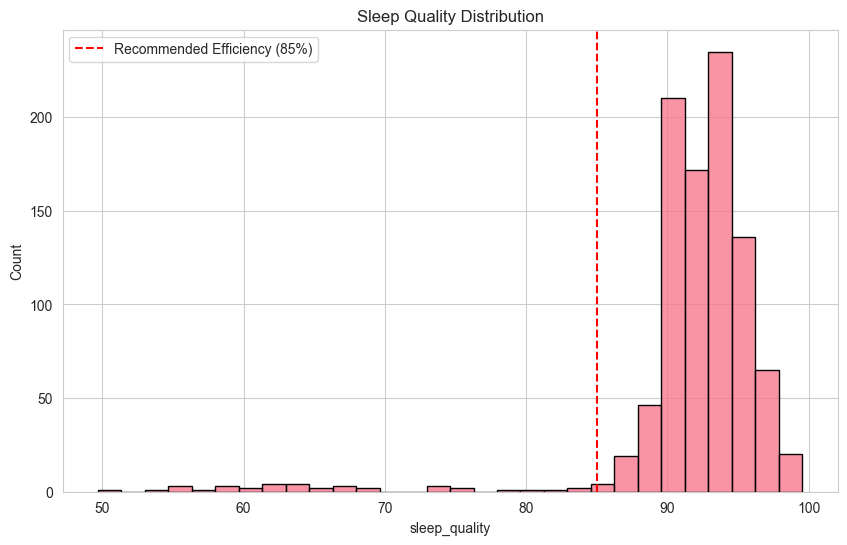

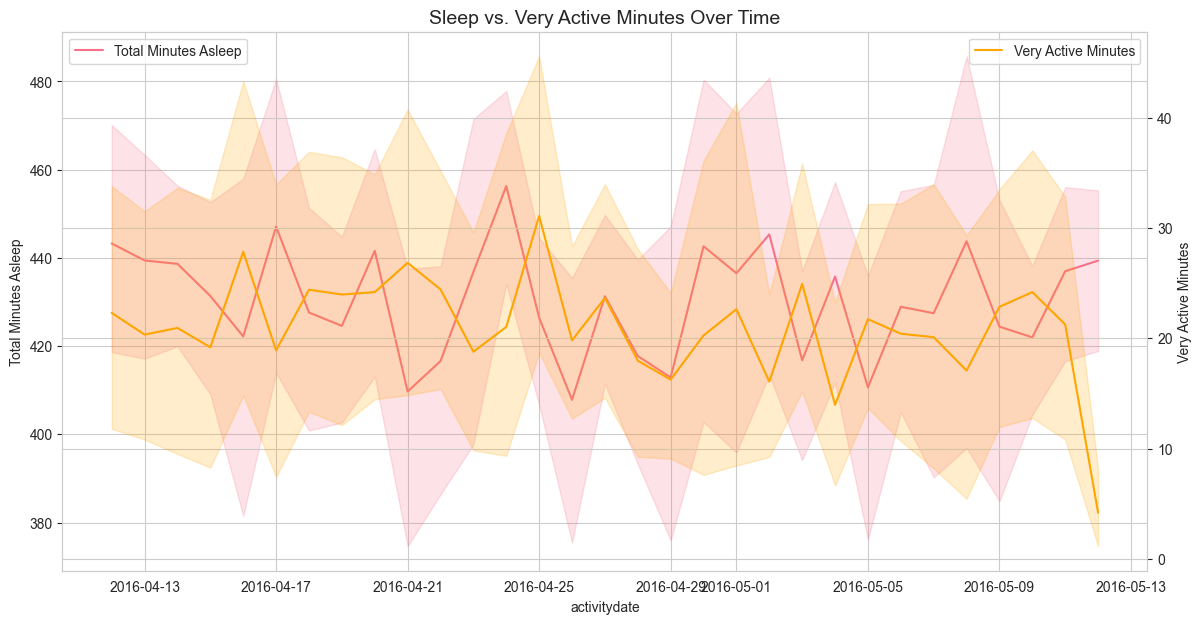

/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:140: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)
/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:140: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)
/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:140: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)


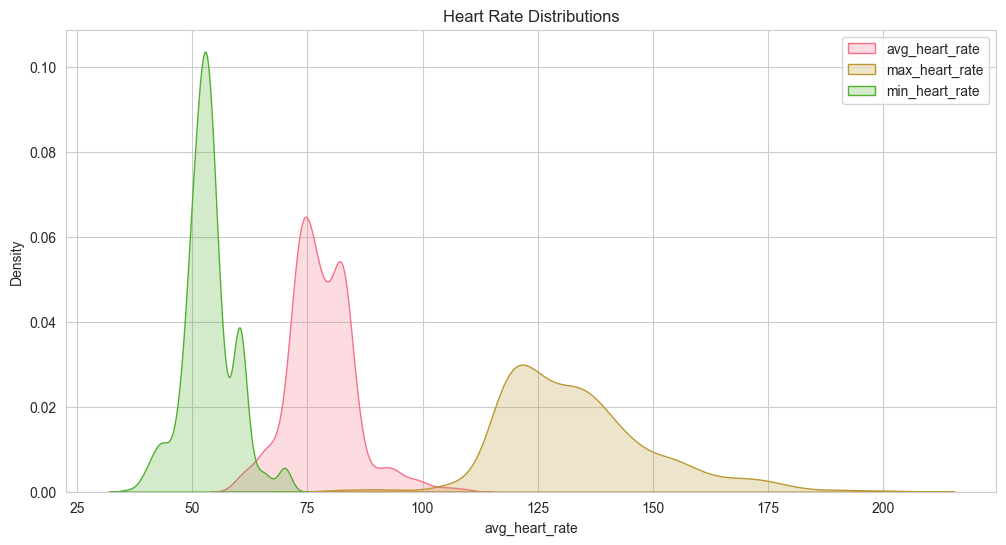

/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:147: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)
/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:147: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)
/var/folders/ks/69lv6khn0zn4lp53hk7k2wqr0000gp/T/ipykernel_18241/3532428624.py:147: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)


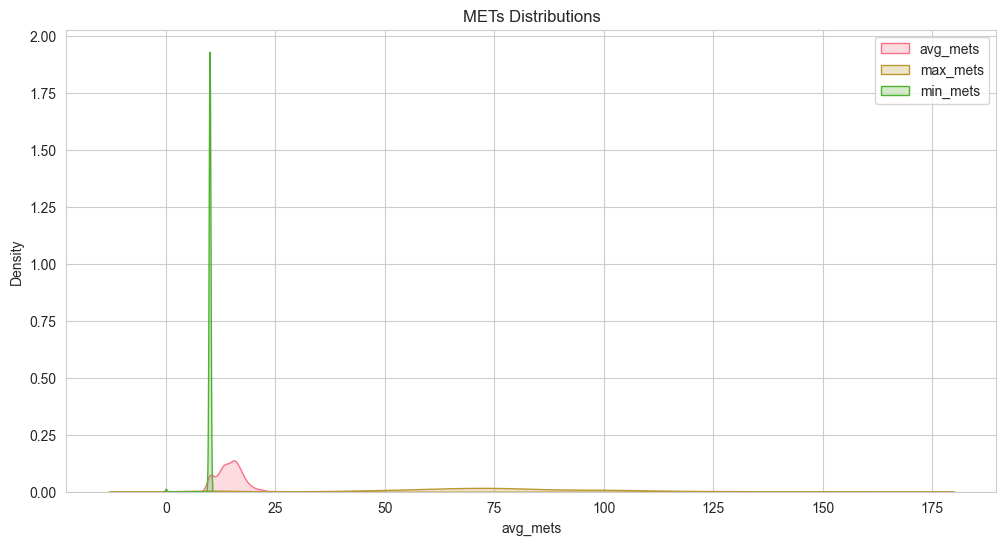


Analyzing and handling outliers...


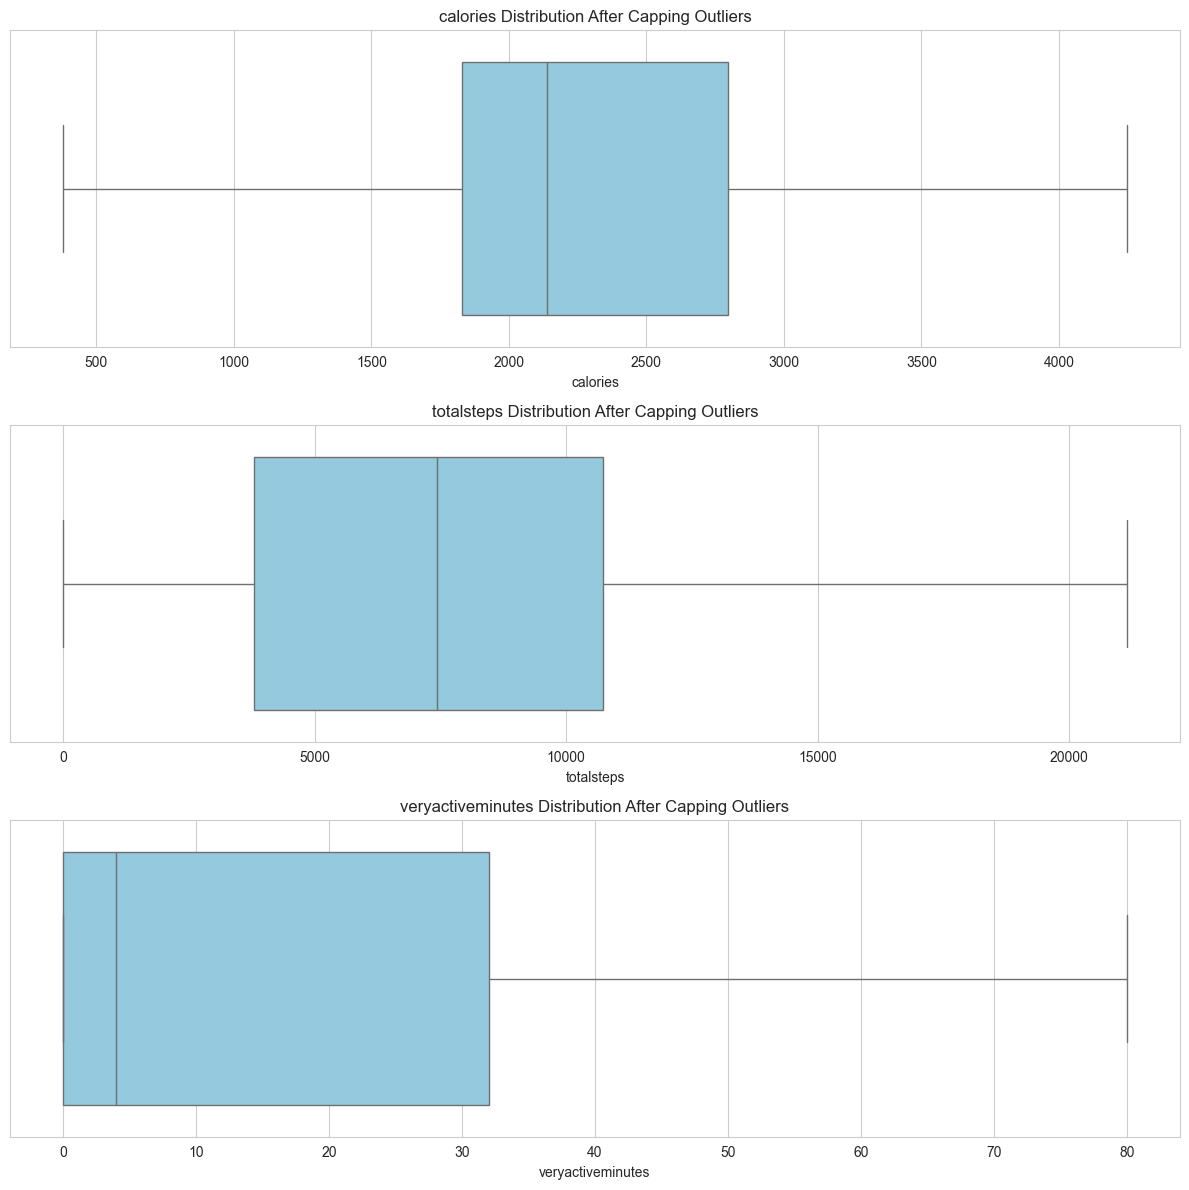


Aggregating weekly data...


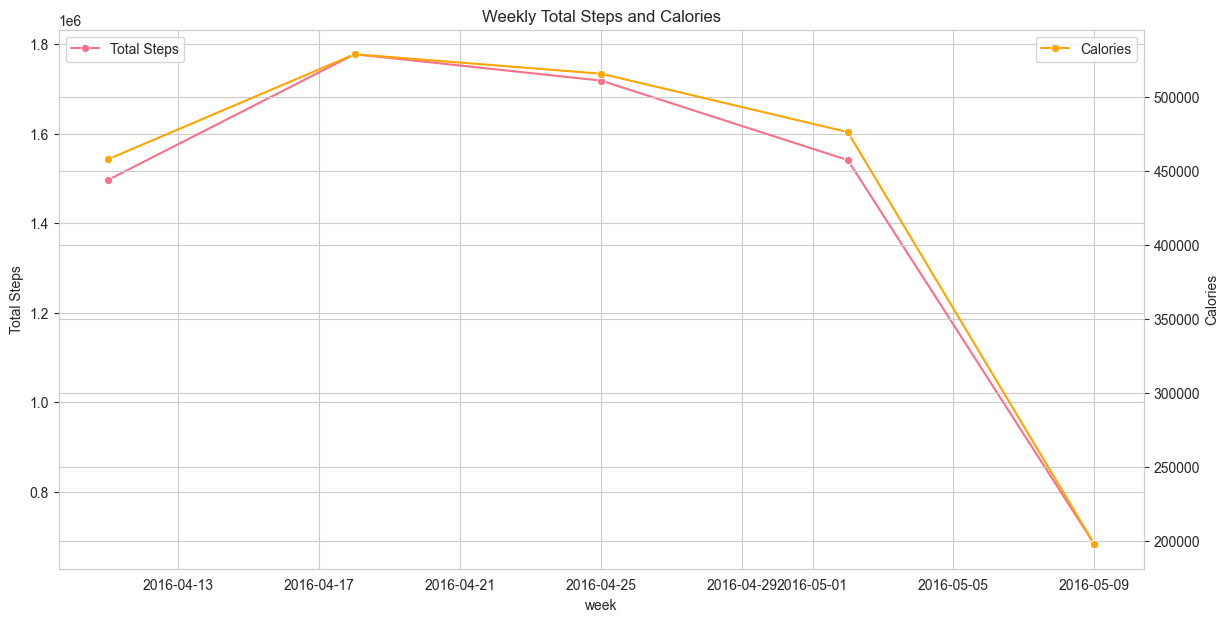


Analyzing feature correlations...


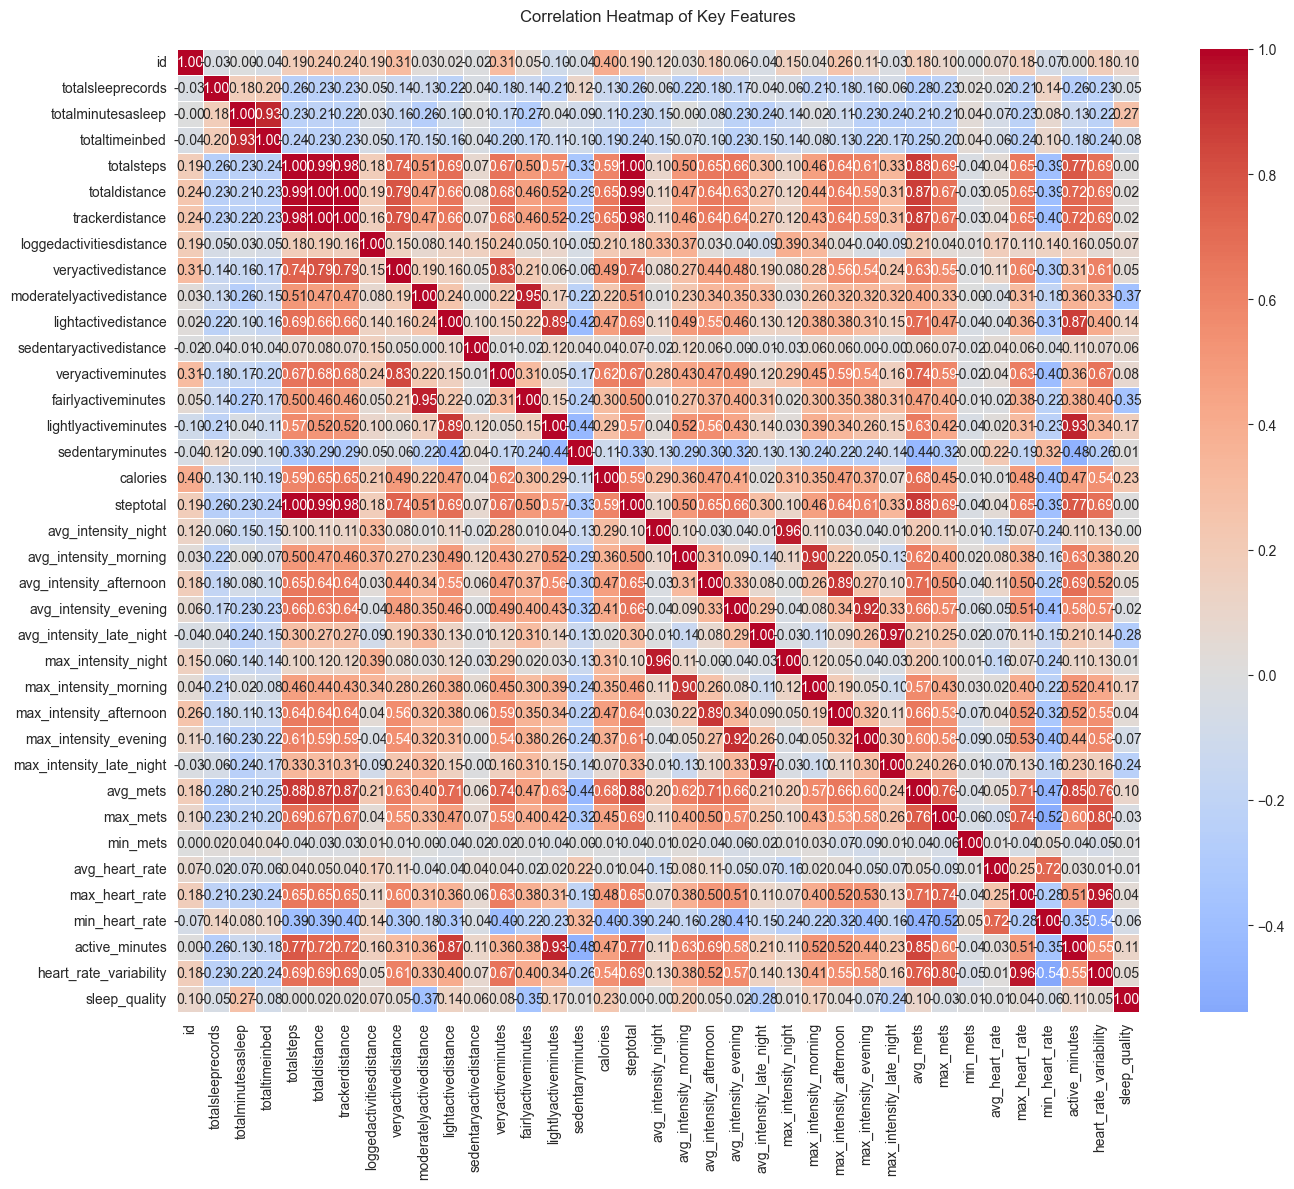

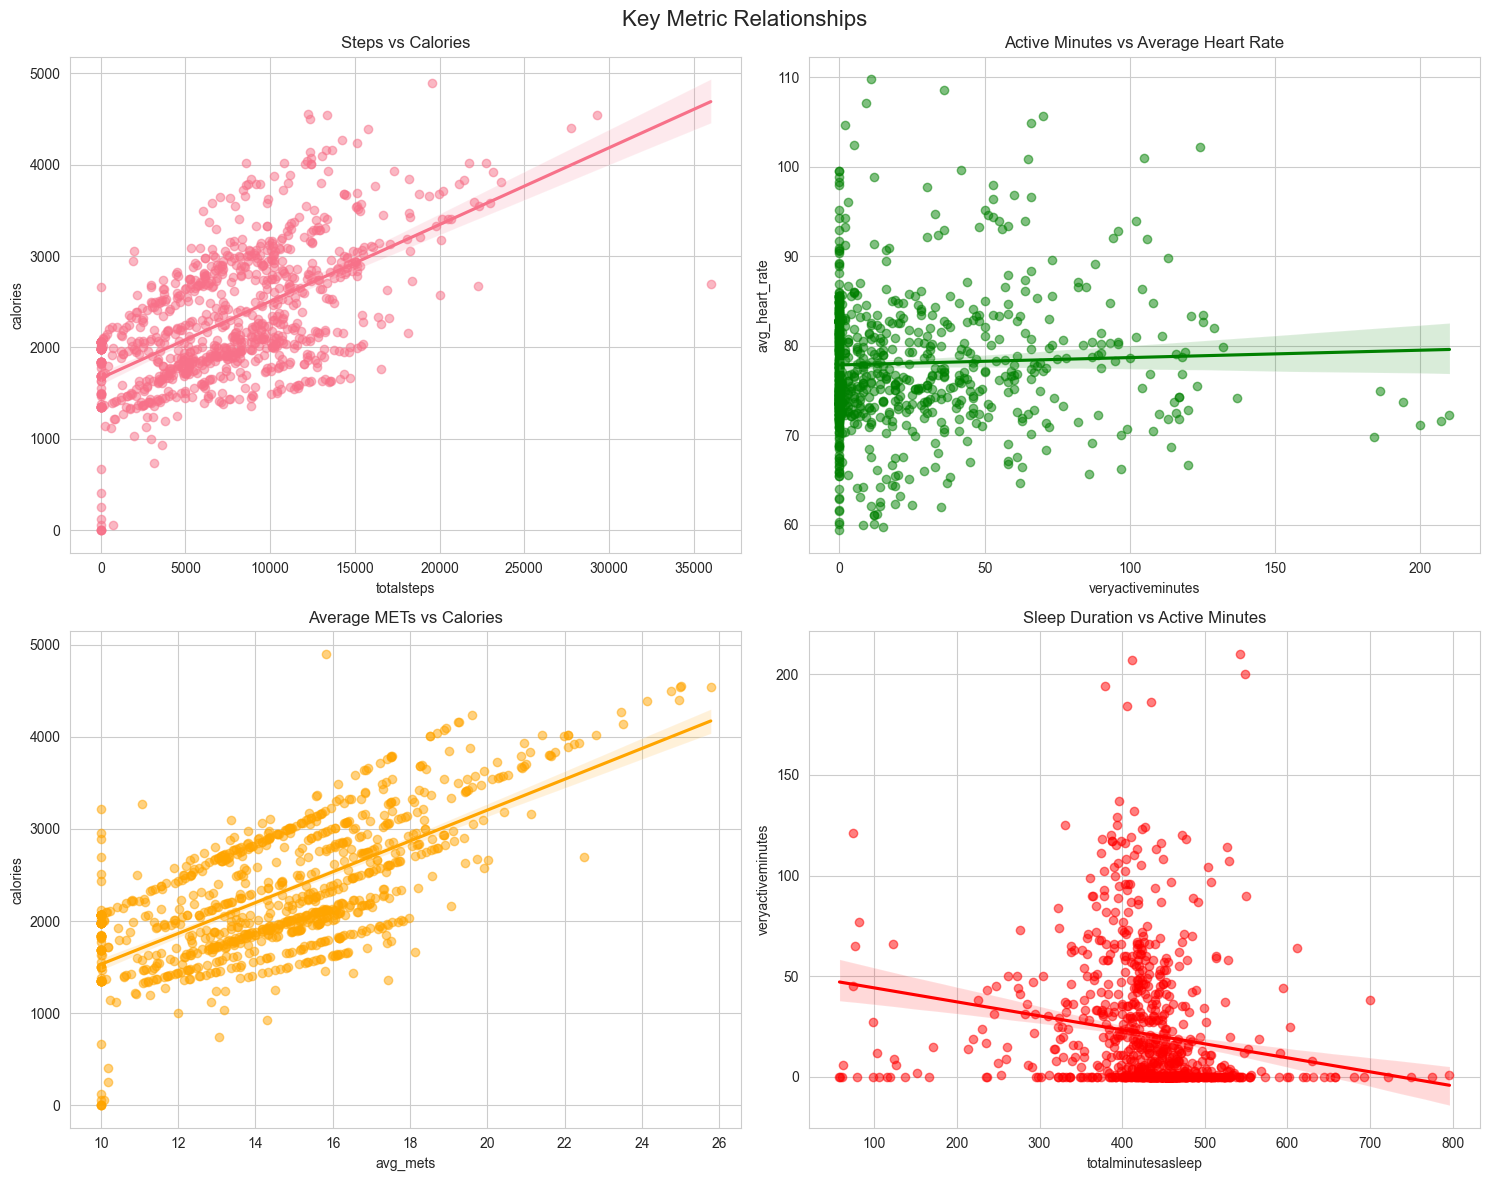


===== Summary Statistics =====
                          count          mean           std           min  \
id                        943.0  4.858486e+09  2.423712e+09  1.503960e+09   
totalsleeprecords         943.0  1.139852e+00  2.382874e-01  1.000000e+00   
totalminutesasleep        943.0  4.302671e+02  8.160802e+01  5.800000e+01   
totaltimeinbed            943.0  4.679246e+02  8.774237e+01  6.100000e+01   
totalsteps                943.0  7.652189e+03  5.086533e+03  0.000000e+00   
totaldistance             943.0  5.502853e+00  3.926509e+00  0.000000e+00   
trackerdistance           943.0  5.488547e+00  3.909291e+00  0.000000e+00   
loggedactivitiesdistance  943.0  1.100454e-01  6.222923e-01  0.000000e+00   
veryactivedistance        943.0  1.504316e+00  2.657626e+00  0.000000e+00   
moderatelyactivedistance  943.0  5.708802e-01  8.847752e-01  0.000000e+00   
lightactivedistance       943.0  3.349258e+00  2.046505e+00  0.000000e+00   
sedentaryactivedistance   943.0  1.601273e-0

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Set Seaborn style
sns.set_style('whitegrid')
sns.set_palette("husl")

# Load Data
# -----------------------------
print("\nLoading the imputed dataset...")
data_path = "../data/processed/df_imputed.csv"
df_imputed = pd.read_csv(data_path)

# Convert activitydate to datetime
if 'activitydate' in df_imputed.columns:
    df_imputed['activitydate'] = pd.to_datetime(df_imputed['activitydate'], errors='coerce')
else:
    print("Error: 'activitydate' column not found in the dataset.")
    
def perform_comprehensive_eda(df_imputed):
    """
    Performs comprehensive EDA on Fitbit data.

    Args:
        df_imputed (pd.DataFrame): Cleaned daily Fitbit data.
    """

    
    # 1. Data Quality Assessment
    # -------------------------
    print("\n===== Data Quality Assessment =====")
    print("\nDataset Shape:", df_imputed.shape)
    print("\nColumn Types:")
    print(df_imputed.dtypes)

    # Check for missing values
    missing = df_imputed.isnull().sum()
    print("\nMissing Values:")
    print(missing[missing > 0])


    # 2. Feature Distribution Analysis
    # ------------------------------
    print("\nPlotting feature distributions...")
    numeric_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns
    
    # All numeric columns histograms
    df_imputed[numeric_cols].hist(figsize=(15, 12))
    plt.tight_layout()
    plt.suptitle("Feature Distributions", fontsize=16, y=1.02)
    plt.show()

    # 3. Activity Analysis
    # ------------------
    # Average daily activity distribution
    activity_cols = ['veryactiveminutes', 'fairlyactiveminutes',
                     'lightlyactiveminutes', 'sedentaryminutes']

    plt.figure(figsize=(10, 6))
    activity_means = df_imputed[activity_cols].mean()
    sns.barplot(x=activity_means.index, y=activity_means.values, palette='husl')
    plt.title("Average Daily Activity Distribution")
    plt.ylabel("Minutes")
    plt.xlabel("Activity Type")
    plt.show()

    # 4. Time Period Analysis
    # ---------------------
    intensity_periods = ['night', 'morning', 'afternoon', 'evening', 'late_night']
    avg_cols = [f'avg_intensity_{period}' for period in intensity_periods]
    max_cols = [f'max_intensity_{period}' for period in intensity_periods]

    # Melt the data for better plotting
    avg_intensity_melted = df_imputed.melt(
        value_vars=avg_cols, var_name='Time Period', value_name='Average Intensity'
    )
    max_intensity_melted = df_imputed.melt(
        value_vars=max_cols, var_name='Time Period', value_name='Maximum Intensity'
    )

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Time Period', y='Average Intensity', data=avg_intensity_melted)
    plt.title('Average Intensity by Time Period')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Time Period', y='Maximum Intensity', data=max_intensity_melted)
    plt.title('Maximum Intensity by Time Period')
    plt.xticks(rotation=45)
    plt.show()

    # 5. Sleep Analysis
    # ---------------
    sleep_cols = ['totalsleeprecords', 'totalminutesasleep', 'totaltimeinbed']

    # Sleep metrics distributions
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Sleep Metrics Distribution", fontsize=16)

    for i, col in enumerate(sleep_cols):
        sns.histplot(data=df_imputed, x=col, bins=30, ax=axes[i], edgecolor='black')
        axes[i].set_title(f'{col.replace("_", " ").title()} Distribution')

    plt.tight_layout()
    plt.show()

    # Sleep quality
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_imputed, x='sleep_quality', bins=30, edgecolor='black')
    plt.axvline(x=85, color='r', linestyle='--', label='Recommended Efficiency (85%)')
    plt.title("Sleep Quality Distribution")
    plt.legend()
    plt.show()

    # Sleep vs. Activity
    fig, ax1 = plt.subplots(figsize=(14, 7))
    sns.lineplot(data=df_imputed, x="activitydate", y="totalminutesasleep", label="Total Minutes Asleep", ax=ax1)
    ax1.set_ylabel("Total Minutes Asleep")
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()
    sns.lineplot(data=df_imputed, x="activitydate", y="veryactiveminutes", label="Very Active Minutes", color='orange', ax=ax2)
    ax2.set_ylabel("Very Active Minutes")
    ax2.legend(loc="upper right")

    plt.title("Sleep vs. Very Active Minutes Over Time", fontsize=14)
    plt.show()

    # 6. Heart Rate and METs Analysis
    # ----------------------------
    hr_cols = ['avg_heart_rate', 'max_heart_rate', 'min_heart_rate']
    mets_cols = ['avg_mets', 'max_mets', 'min_mets']

    plt.figure(figsize=(12, 6))
    for col in hr_cols:
        sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)
    plt.title("Heart Rate Distributions")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    for col in mets_cols:
        sns.kdeplot(data=df_imputed, x=col, shade=True, label=col)
    plt.title("METs Distributions")
    plt.legend()
    plt.show()

    # 7. Outlier Analysis and Handling
    # -----------------------------
    print("\nAnalyzing and handling outliers...")
    key_metrics = ['calories', 'totalsteps', 'veryactiveminutes']

    cleaned_data = df_imputed.copy()

    for metric in key_metrics:
        Q1 = df_imputed[metric].quantile(0.25)
        Q3 = df_imputed[metric].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers instead of removing them
        cleaned_data[metric] = np.where(
            cleaned_data[metric] < lower_bound, lower_bound,
            np.where(cleaned_data[metric] > upper_bound, upper_bound, cleaned_data[metric])
        )

    # Visualize after capping
    fig, axes = plt.subplots(len(key_metrics), 1, figsize=(12, 4 * len(key_metrics)))
    for i, metric in enumerate(key_metrics):
        sns.boxplot(data=cleaned_data, x=metric, ax=axes[i], color='skyblue')
        axes[i].set_title(f'{metric} Distribution After Capping Outliers')

    plt.tight_layout()
    plt.show()

    # 8. Weekly Aggregation and Trends
    # -----------------------------
    print("\nAggregating weekly data...")
    df_imputed["week"] = df_imputed["activitydate"].dt.to_period("W").apply(lambda r: r.start_time)
    weekly_aggregated = df_imputed.groupby("week").agg({
        'totalsteps': 'sum',
        'calories': 'sum',
        'sedentaryminutes': 'mean',
        'veryactiveminutes': 'sum',
        'totalminutesasleep': 'mean',
        'avg_heart_rate': 'mean'
    }).reset_index()

    # Plot weekly trends
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.lineplot(data=weekly_aggregated, x="week", y="totalsteps", marker='o', label="Total Steps")
    ax.set_ylabel("Total Steps")
    ax.legend(loc="upper left")

    ax2 = ax.twinx()
    sns.lineplot(data=weekly_aggregated, x="week", y="calories", marker='o', color='orange', label="Calories", ax=ax2)
    ax2.set_ylabel("Calories")
    ax2.legend(loc="upper right")

    plt.title("Weekly Total Steps and Calories")
    plt.show()

    # 9. Correlation Analysis
    # --------------------
    print("\nAnalyzing feature correlations...")
    correlations = df_imputed[numeric_cols].corr()

    plt.figure(figsize=(14, 12))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap of Key Features", pad=20)
    plt.tight_layout()
    plt.show()

    # 10. Key Relationships
    # ------------------
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle("Key Metric Relationships", fontsize=16)

    sns.regplot(data=df_imputed, x='totalsteps', y='calories', ax=axes[0, 0], scatter_kws={'alpha':0.5})
    axes[0, 0].set_title('Steps vs Calories')

    sns.regplot(data=df_imputed, x='veryactiveminutes', y='avg_heart_rate', ax=axes[0, 1], scatter_kws={'alpha':0.5}, color='green')
    axes[0, 1].set_title('Active Minutes vs Average Heart Rate')

    sns.regplot(data=df_imputed, x='avg_mets', y='calories', ax=axes[1, 0], scatter_kws={'alpha':0.5}, color='orange')
    axes[1, 0].set_title('Average METs vs Calories')

    sns.regplot(data=df_imputed, x='totalminutesasleep', y='veryactiveminutes', ax=axes[1, 1], scatter_kws={'alpha':0.5}, color='red')
    axes[1, 1].set_title('Sleep Duration vs Active Minutes')

    plt.tight_layout()
    plt.show()

    # 11. Summary Statistics
    # -------------------
    print("\n===== Summary Statistics =====")
    summary_stats = df_imputed[numeric_cols].describe().transpose()
    print(summary_stats)

perform_comprehensive_eda(df_imputed)